# 3-Programming Exercise 3:Neural Networks Coursera

Let's take a look at a scenario where we can recognize different numbers [0-9].

**The first file manual_Neural_Networks_ex3 has some of explanation handling**

**The data set are about 5000 image**

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy.io import loadmat # because  the data is in mat extension

Using TensorFlow backend.


In [2]:
df_file = loadmat('csv_files/ex3data1.mat')
print("The columns of the file are\n", df_file.keys())

The columns of the file are
 dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [3]:
X = df_file['X']
y = df_file['y'].ravel()
m, n = X.shape
print("The shape of our features: ", X.shape)
print("The shape of our labels: ", y.shape)

The shape of our features:  (5000, 400)
The shape of our labels:  (5000,)


### visualize an image of your data with its features and label

The features of the image 5 are
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000

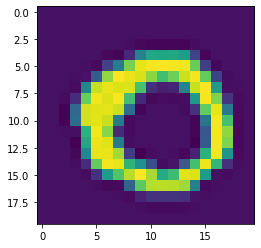

In [4]:
print("The features of the image 5 are\n",X[5]) # I will use it letter for tessing
print("The label of the image 5 are: ",y[5])
test = X[5]
test = np.reshape(test, (20,20))
plt.imshow(test)

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    '''
    it's useful to use call back function that terminate your algorithm when its reach the accuracy you need.
    it's save a lot of time.
    '''
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True


In [6]:
def NNmodel(X,Y, epochs):
    '''
    A Neural Network that contain just 4 layers.
    input layer instead of each image as 20*20 this will Flatten() to be 400.
    first hidden layer with 512 neurons and use relu as activation function.
    second hidden layer with 256 neurons and use relu as activation function.
    output layer with 10 predicted values in our data.
    '''

    callbacks = myCallback() # instance from the class
    model = tf.keras.Sequential() # create sequential model
    model.add(tf.keras.layers.Flatten()) # input layer
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu)) # first hidden layer
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu)) # second hidden layer
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

# compile the model with Adam optimizer Algorithm
    model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    model.fit(X,Y, epochs=epochs, callbacks=[callbacks])
    return model

In [7]:
y = np.where(y==10, 0, y) # handle the issue of data as 0 number is denoted as 10 so fix this to pass to model

In [8]:
model = NNmodel(X, y, 15)

Train on 5000 samples
Epoch 1/15
5000/5000 [==============================] - 1s 212us/sample - loss: 0.5001 - accuracy: 0.8536
Epoch 2/15
5000/5000 [==============================] - 1s 154us/sample - loss: 0.1955 - accuracy: 0.9446
Epoch 3/15
5000/5000 [==============================] - 1s 142us/sample - loss: 0.1238 - accuracy: 0.9644
Epoch 4/15
4704/5000 [===========================>..] - ETA: 0s - loss: 0.0705 - accuracy: 0.9796
Reached 97% accuracy so cancelling training!
5000/5000 [==============================] - 1s 145us/sample - loss: 0.0710 - accuracy: 0.9794


In [9]:
## Test the model with unseen data
model.evaluate(X, y)

5000/5000 [==============================] - 0s 73us/sample - loss: 0.0717 - accuracy: 0.9798


[0.07169490720592439, 0.9798]

In [10]:
predict = model.predict(X)

In [11]:
test = predict[4000]
test

array([5.0724124e-05, 1.5215272e-03, 3.3676231e-06, 1.2332259e-04,
       2.7678921e-04, 2.0397638e-03, 2.9207399e-06, 2.7284968e-05,
       9.9518102e-01, 7.7323191e-04], dtype=float32)

In [12]:
max_index_row = np.argmax(test, axis=0) # return the index of the biggest value from these 10 values
max_index_row

8

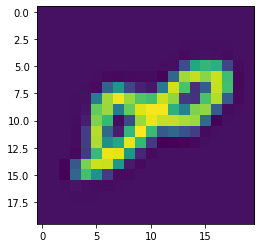

In [13]:
test = X[4000] # seems to 8
test = np.reshape(test, (20,20))
plt.imshow(test)